## How are in-demand skills trending for Data Analysts?

**Methology**

1. Aggregate Skill counts Monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [ ]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

df_DA_US_explode = df_DA_US.explode('job_skills')

df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

In [38]:
DA_Totals = df_DA_US.groupby('job_posted_month_no').size()
DA_Totals

job_posted_month_no
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [39]:
# Convert skill counts to percentage of total job postings per month
df_DA_US_percent = df_DA_US_pivot.div(DA_Totals, axis=0) * 100

#cChanges month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')


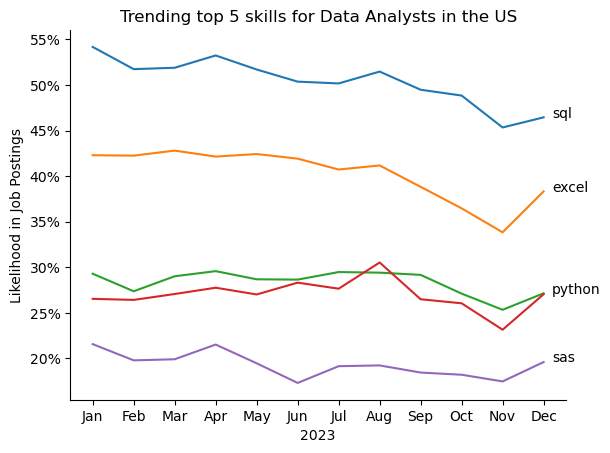

In [ ]:

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.despine()

plt.title('Trending top 5 skills for Data Analysts in the US')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings') 
plt.legend().remove()  

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

important = [0, 1, 3, 4]  # only 4 lines due to overlap
for i in important:
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
    
plt.show()
